In [1]:
import os
import json
import requests
import pandas as pd
import utils.utils as utils
from tqdm import tqdm
from pymongo import MongoClient


dataset = {
    "Round1_T2D": {
        "tables": "./data/Dataset/Round1_T2D/tables",
        "cea":"./data/Dataset/Round1_T2D/gt/CEA_Round1_gt_WD.csv",
        "cpa":"./data/Dataset/Round1_T2D/gt/CPA_Round1_gt.csv",
        "cta": "./data/Dataset/Round1_T2D/gt/CTA_Round1_gt.csv"
    },
    "Round3": {
        "tables": "./data/Dataset/Round3_2019/tables/",
        "cea":"./data/Dataset/Round3_2019/gt/CEA_Round3_gt_WD.csv",
        "cpa":"./data/Dataset/Round3_2019/gt/CPA_Round3_gt.csv",
        "cta": "./data/Dataset/Round3_2019/gt/CTA_Round3_gt.csv"
    },
    "Round4": {
        "tables": "./data/Dataset/Round4_2020/tables/",
        "cea":"./data/Dataset/Round4_2020/gt/cea.csv",
        "cpa":"./data/Dataset/Round4_2020/gt/cpa.csv",
        "cta": "./data/Dataset/Round4_2020/gt/cta.csv"
    },
    "2T-2020": {
        "tables":"./data/Dataset/2T_Round4/tables/", 
        "cea":"./data/Dataset/2T_Round4/gt/cea.csv",
        "cpa": None,
        "cta": "./data/Dataset/2T_Round4/gt/cta.csv"
    },
    "HardTableR2-2021": {
        "tables":"./data/Dataset/HardTablesR2/tables/", 
        "cea":"./data/Dataset/HardTablesR2/gt/cea.csv",
        "cpa":"./data/Dataset/HardTablesR2/gt/cpa.csv",
        "cta": "./data/Dataset/HardTablesR2/gt/cta.csv"
    },
    "HardTableR3-2021": {
        "tables":"./data/Dataset/HardTablesR3/tables/", 
        "cea":"./data/Dataset/HardTablesR3/gt/cea.csv",
        "cpa":"./data/Dataset/HardTablesR3/gt/cpa.csv",
        "cta": "./data/Dataset/HardTablesR3/gt/cta.csv"
    }
}
temp = {"mammotab": {
        "tables":"./data/Dataset/mammotab-sample/tables/", 
        "cea":"./data/Dataset/mammotab-sample/gt/cea.csv",
        "cpa":None,
        "cta": "./data/Dataset/mammotab-sample/gt/cta.csv"
}
}


id_dataset = "Round3"
tables_path, cea_target_path, cpa_target_path, cta_target_path = list(dataset[id_dataset].values())
#cea_gt = utils.get_cea_ann(cea_target_path)
# _mtest5 R2 best

In [10]:
cta_weights, cta_buffer   = utils.get_cta_types_table_to_column(f"{id_dataset}_100_m7")

100%|██████████| 9736/9736 [00:00<00:00, 57767.27it/s]


In [2]:
cpa_weights, cpa_buffer = utils.get_cpa_types_table_to_column(f"{id_dataset}_100_m7")

100%|██████████| 9736/9736 [00:00<00:00, 144758.84it/s]


In [ ]:
cpa_weights["v10_21"]

In [4]:
final_weights = {}
for id_column in cpa_weights["v10_21"]:
    final_weights[id_column] = {}
    result = sorted(cpa_weights["v10_21"][id_column].items(), key=lambda x: x[1], reverse=True)
    for id_type, score in result[0:5]:
        final_weights[id_column][id_type] = score

In [20]:
final_weights = {}
for id_column in cta_weights["v10_21"]:
    final_weights[id_column] = {}
    result = sorted(cta_weights["v10_21"][id_column].items(), key=lambda x: x[1], reverse=True)
    for id_type, score in result[0:5]:
        final_weights[id_column][id_type] = score

In [5]:
final_weights

{'0': {'P159': 0.79, 'P1885': 0.12, 'P131': 0.07, 'P2389': 0.07, 'P301': 0.05},
 '1': {'P131': 0.59, 'P159': 0.39, 'P931': 0.29, 'P1889': 0.25, 'P1376': 0.24},
 '6': {},
 '3': {'P131': 0.59, 'P159': 0.39, 'P931': 0.29, 'P1889': 0.25, 'P1376': 0.24},
 '4': {'P131': 0.59, 'P159': 0.39, 'P931': 0.29, 'P1889': 0.25, 'P1376': 0.24},
 '5': {},
 '2': {'P131': 0.59, 'P159': 0.39, 'P931': 0.29, 'P1889': 0.25, 'P1376': 0.24}}

In [ ]:
sorted(cta_weights["v10_21"]["1"].items(), key=lambda x: x[1], reverse=True)

In [2]:
for id_dataset in dataset:
    tables_path, cea_target_path, cpa_target_path, cta_target_path = list(dataset[id_dataset].values())
    metrics, ann, err = utils.cea_eval(f"{id_dataset}_TEST", cea_target_path, resolve_disambiguation=True)
    print(id_dataset, metrics)

100%|██████████| 8078/8078 [00:00<00:00, 227442.05it/s]


Round1_T2D {'P': 0.8074780240188189, 'R': 0.8073780638771973, 'F1': 0.8074280408542246}


100%|██████████| 390456/390456 [00:02<00:00, 142047.19it/s]


Round3 {'P': 0.7332708422972115, 'R': 0.7332708422972115, 'F1': 0.7332708422972115}


100%|██████████| 994920/994920 [00:06<00:00, 142242.32it/s]


Round4 {'P': 0.89410497649682, 'R': 0.8903278655570297, 'F1': 0.8922124235195054}


100%|██████████| 667243/667243 [00:05<00:00, 125446.51it/s]


2T-2020 {'P': 0.8500204767098053, 'R': 0.8492153533270488, 'F1': 0.8496177242786692}


100%|██████████| 47439/47439 [00:00<00:00, 135637.05it/s]


HardTableR2-2021 {'P': 0.89720696456217, 'R': 0.8917978878138241, 'F1': 0.8944942489851151}


100%|██████████| 58948/58948 [00:00<00:00, 162978.79it/s]

HardTableR3-2021 {'P': 0.5057218759579033, 'R': 0.5037829951821945, 'F1': 0.5047505736381406}


In [30]:
for id_dataset in dataset:
    tables_path, cea_target_path, cpa_target_path, cta_target_path = list(dataset[id_dataset].values())
    metrics, ann, err = utils.cea_eval(f"{id_dataset}_TEST", cea_target_path, resolve_disambiguation=True)
    print(id_dataset, metrics)

100%|██████████| 8078/8078 [00:00<00:00, 222909.58it/s]


Round1_T2D {'P': 0.8373158350872849, 'R': 0.8372121812329785, 'F1': 0.8372640049520274}


100%|██████████| 390456/390456 [00:02<00:00, 146542.10it/s]


Round3 {'P': 0.7432873358329748, 'R': 0.7432873358329748, 'F1': 0.7432873358329748}


100%|██████████| 994920/994920 [00:07<00:00, 132080.82it/s]


Round4 {'P': 0.9086469698208469, 'R': 0.9048084268081856, 'F1': 0.906723635790429}


100%|██████████| 667243/667243 [00:05<00:00, 126707.56it/s]


2T-2020 {'P': 0.8633025857659115, 'R': 0.8624848818196669, 'F1': 0.8628935400726017}


100%|██████████| 47439/47439 [00:00<00:00, 127307.98it/s]


HardTableR2-2021 {'P': 0.9168663711746866, 'R': 0.9113387718965408, 'F1': 0.9140942151556156}


100%|██████████| 58948/58948 [00:00<00:00, 162156.17it/s]

HardTableR3-2021 {'P': 0.5989918599502742, 'R': 0.5966953925493655, 'F1': 0.5978414209229199}


In [46]:
NIL_entities = set([
json.loads(line)[0]
for line in open("data/output_NIL2.jsonl")
])

In [41]:
len(NIL_entities), len(set(NIL_entities))

(2063185, 2063185)

In [47]:
buffer = {}
for id_dataset in dataset:
    buffer[f"{id_dataset}_100_m7"] = []
    utils.get_my_cea_annotation_NIL(f"{id_dataset}_100_m7", NIL_entities, buffer)

100%|██████████| 58949/58949 [00:06<00:00, 9481.90it/s] 


In [48]:
len(buffer[f"2T-2020_100_m7"])

15961

In [2]:
output = []
file = open("data/output_NIL.jsonl", "w")
for id_dataset in dataset:
    tables_path, cea_target_path, cpa_target_path, cta_target_path = list(dataset[id_dataset].values())
    metric, missing = utils.cea_eval_missing(f"{id_dataset}_100_m4", cea_target_path)
    for line in missing:
        file.write(f"{json.dumps(line)}\n")
    break    

100%|██████████| 8078/8078 [00:00<00:00, 38762.93it/s]


In [ ]:
buffer[f"2T-2020_100_m7"]

In [51]:
import statistics
for id_dataset in buffer:
    try:
        print(id_dataset, statistics.mean(buffer[id_dataset]))
    except:
        pass

Round1_T2D_100_m7 0.7408073770491803
Round3_100_m7 0.8596906714279416
Round4_100_m7 0.5877598437777384
2T-2020_100_m7 0.48307443142660234
HardTableR2-2021_100_m7 0.5472243243243243
HardTableR3-2021_100_m7 0.49426482098854907


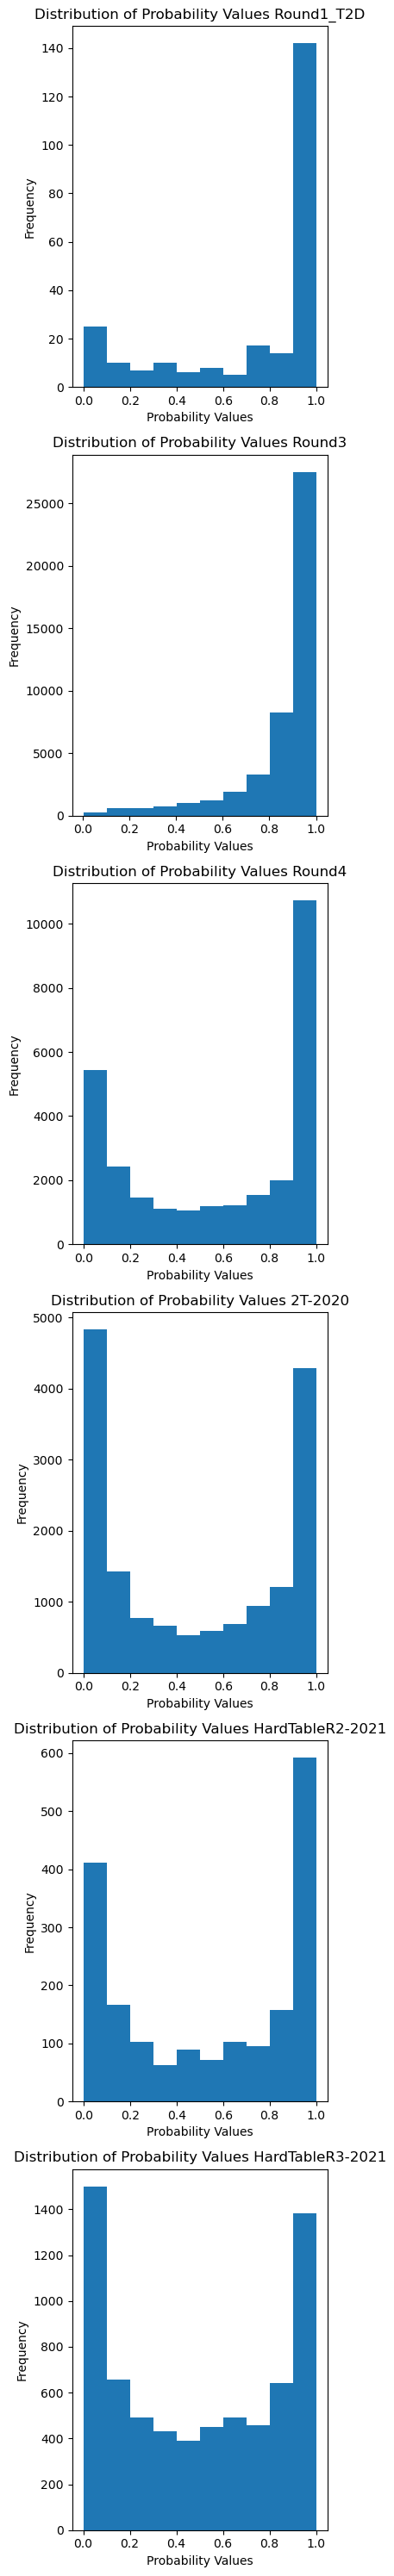

In [50]:
import matplotlib.pyplot as plt
import numpy as np


    # Create a figure with subplots for each array
fig, axs = plt.subplots(len(buffer), 1, figsize=(4, 30))

# Iterate through each array and plot the histogram of the probability values
for i, id_dataset in enumerate(buffer):
    axs[i].hist(buffer[id_dataset], bins=10)
    axs[i].set_xlabel('Probability Values')
    axs[i].set_ylabel('Frequency')
    axs[i].set_title(f'Distribution of Probability Values {id_dataset.split("_100")[0]}')
# Adjust the layout of the subplots
fig.tight_layout()
plt.subplots_adjust(wspace=0.3)

# Display the plot
plt.show()


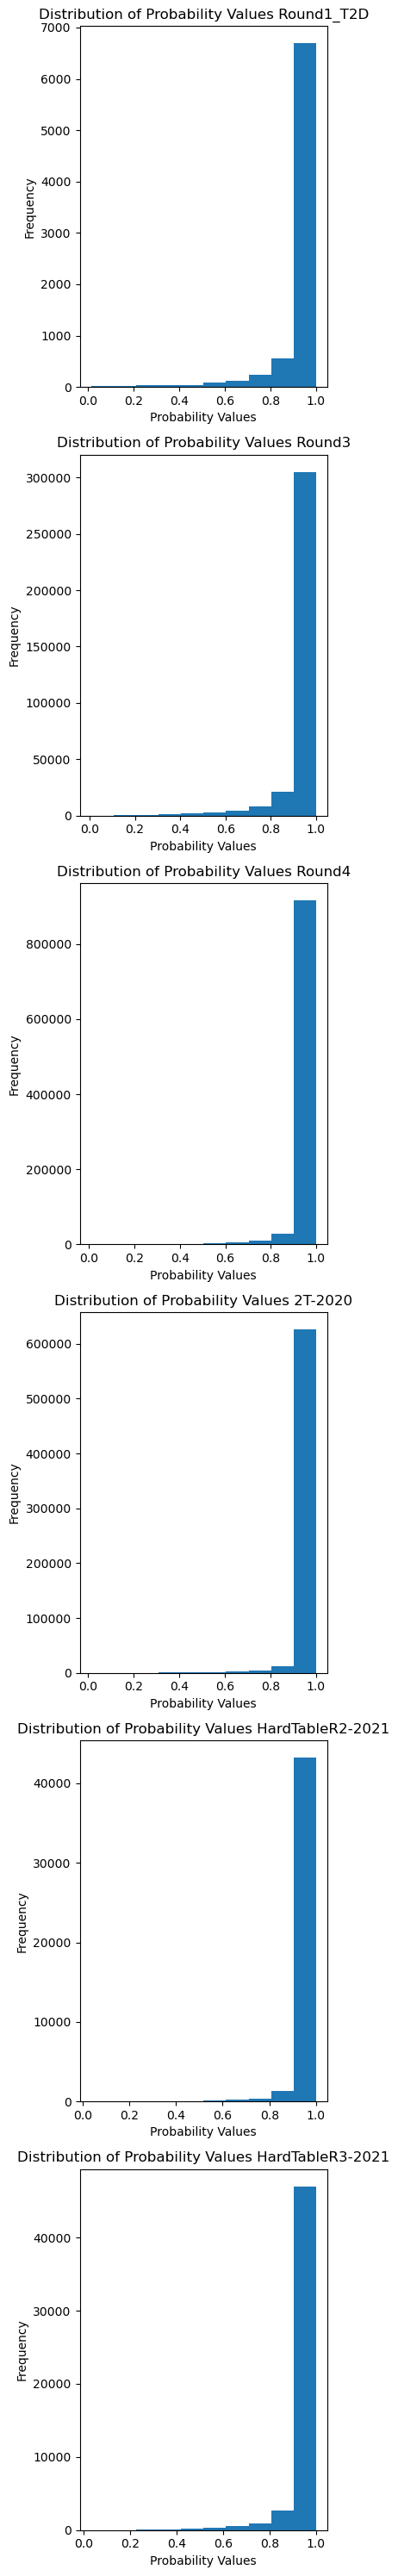

In [44]:
import matplotlib.pyplot as plt
import numpy as np


    # Create a figure with subplots for each array
fig, axs = plt.subplots(len(buffer), 1, figsize=(4, 30))

# Iterate through each array and plot the histogram of the probability values
for i, id_dataset in enumerate(buffer):
    axs[i].hist(buffer[id_dataset], bins=10)
    axs[i].set_xlabel('Probability Values')
    axs[i].set_ylabel('Frequency')
    axs[i].set_title(f'Distribution of Probability Values {id_dataset.split("_100")[0]}')
# Adjust the layout of the subplots
fig.tight_layout()
plt.subplots_adjust(wspace=0.3)

# Display the plot
plt.show()

In [3]:
cta1, cta2 = utils.get_cta_types_table_to_column(f"{id_dataset}_100_m4", top_k_type=5)

100%|██████████| 323/323 [00:00<00:00, 78673.65it/s]


In [62]:
tables_path, cea_target_path, cpa_target_path, cta_target_path = list(dataset[id_dataset].values())
metrics, ann, err = utils.cea_eval(f"{id_dataset}_mtest6", cea_target_path, resolve_disambiguation=True)
print(id_dataset, metrics)

100%|██████████| 58948/58948 [00:00<00:00, 230396.05it/s]


HardTableR3-2021 {'P': 0.85276387044038, 'R': 0.8494944697021103, 'F1': 0.8511260304240673}


In [9]:
tables_path, cea_target_path, cpa_target_path, cta_target_path = list(dataset[id_dataset].values())
metrics, ann, err = utils.cea_eval(f"{id_dataset}_mtest1", cea_target_path, resolve_disambiguation=True)
print(id_dataset, metrics)

100%|██████████| 47439/47439 [00:00<00:00, 158233.27it/s]

HardTableR2-2021 {'P': 0.9139609356774755, 'R': 0.9084508526739602, 'F1': 0.9111975642760488}


In [2]:
tables_path, cea_target_path, cpa_target_path, cta_target_path = list(dataset[id_dataset].values())
metric, missing = utils.cea_eval_missing(f"{id_dataset}_100", cea_target_path)
print(id_dataset, metric)

100%|██████████| 279104/279104 [00:01<00:00, 199820.09it/s]


mammotab 0.94


In [ ]:
tables_path, cea_target_path, cpa_target_path, cta_target_path = list(dataset[id_dataset].values())
metrics, ann, err = utils.cea_eval(f"{id_dataset}_mft", cea_target_path, resolve_disambiguation=True)
print(id_dataset, metrics)

In [3]:
for id_dataset in dataset:
    tables_path, cea_target_path, cpa_target_path, cta_target_path = list(dataset[id_dataset].values())
    metric, missing = utils.cea_eval_missing(f"{id_dataset}_100_m4", cea_target_path)
    print(id_dataset, metric)

100%|██████████| 8078/8078 [00:00<00:00, 37720.06it/s]


Round1_T2D 0.97


100%|██████████| 390456/390456 [00:04<00:00, 78313.23it/s] 


Round3 0.88


100%|██████████| 667243/667243 [00:08<00:00, 79646.30it/s] 


2T-2020 0.98


100%|██████████| 47439/47439 [00:00<00:00, 80352.27it/s] 


HardTableR2-2021 0.95


100%|██████████| 58948/58948 [00:00<00:00, 205816.43it/s]


HardTableR3-2021 0.88


In [51]:
key_to_cell = utils.get_key_to_cell(tables_path)
cell_to_entity = {}
for key in tqdm(cea_gt):
    if key not in key_to_cell:
        continue
    cell = key_to_cell[key]
    if cell not in cell_to_entity:
        cell_to_entity[cell] = []
    entity = [id_entity.upper() for id_entity in cea_gt[key]]
    if entity not in cell_to_entity[cell]:
        cell_to_entity[cell].append(entity)

100%|██████████| 8078/8078 [00:00<00:00, 161452.37it/s]


In [22]:
len(buffer)

45710

In [52]:
buffer = []
out = open(f"{id_dataset}_gt.jsonl", "w")
for cell in tqdm(cell_to_entity):
    buffer.append({"cell": cell, "value": cell_to_entity[cell]})
    
    if len(buffer) >= 1000:
        out.write(f"{json.dumps(buffer)}\n")
        buffer = []
        
if len(buffer) > 0:
    out.write(f"{json.dumps(buffer)}\n")
    buffer = []
    
out.close()    

100%|██████████| 6174/6174 [00:00<00:00, 118242.20it/s]


In [7]:
for id_dataset in dataset:
    tables_path, cea_target_path, cpa_target_path, cta_target_path = list(dataset[id_dataset].values())
    metrics, ann, err = utils.cea_eval(f"{id_dataset}_100_m7", cea_target_path, resolve_disambiguation=True)
    print(id_dataset, metrics)

100%|██████████| 8078/8078 [00:00<00:00, 231439.51it/s]


Round1_T2D {'P': 0.862572737402501, 'R': 0.8624659569200297, 'F1': 0.8625193438563912}


100%|██████████| 390456/390456 [00:02<00:00, 140806.29it/s]


Round3 {'P': 0.7969502325486099, 'R': 0.7969502325486099, 'F1': 0.7969502325486099}


100%|██████████| 994920/994920 [00:07<00:00, 133669.97it/s]


Round4 {'P': 0.9286792220469167, 'R': 0.9246944477947976, 'F1': 0.9266825512661093}


100%|██████████| 667243/667243 [00:05<00:00, 116853.03it/s]


2T-2020 {'P': 0.9494787814782535, 'R': 0.9485794530628272, 'F1': 0.9490289042129049}


100%|██████████| 47439/47439 [00:00<00:00, 156703.21it/s]


HardTableR2-2021 {'P': 0.9139609356774755, 'R': 0.9084508526739602, 'F1': 0.9111975642760488}


100%|██████████| 58948/58948 [00:00<00:00, 153070.46it/s]


HardTableR3-2021 {'P': 0.7599196212663056, 'R': 0.75700617493384, 'F1': 0.7584601002804453}


0it [00:00, ?it/s]
100%|██████████| 279104/279104 [00:01<00:00, 151189.13it/s]

mammotab {'P': 0, 'R': 0.0, 'F1': 0}


In [3]:
for id_dataset in dataset:
    tables_path, cea_target_path, cpa_target_path, cta_target_path = list(dataset[id_dataset].values())
    metrics, ann, err = utils.cea_eval(f"{id_dataset}_100_m5", cea_target_path, resolve_disambiguation=True)
    print(id_dataset, metrics)

100%|██████████| 8078/8078 [00:00<00:00, 226652.40it/s]


Round1_T2D {'P': 0.7736783459205151, 'R': 0.7735825699430552, 'F1': 0.7736304549675023}


100%|██████████| 390456/390456 [00:03<00:00, 129938.32it/s]


Round3 {'P': 0.6988239391890507, 'R': 0.6988239391890507, 'F1': 0.6988239391890507}


100%|██████████| 994920/994920 [00:07<00:00, 132069.62it/s]


Round4 {'P': 0.8630506996448027, 'R': 0.8594047762634182, 'F1': 0.8612238792891147}


100%|██████████| 667243/667243 [00:05<00:00, 121629.72it/s]


2T-2020 {'P': 0.8202144879097405, 'R': 0.8194375961980868, 'F1': 0.8198258580024501}


100%|██████████| 47439/47439 [00:00<00:00, 115000.74it/s]


HardTableR2-2021 {'P': 0.8334994592072614, 'R': 0.8284744619405974, 'F1': 0.8309793640054126}


100%|██████████| 58948/58948 [00:00<00:00, 128401.77it/s]


HardTableR3-2021 {'P': 0.4777596130921971, 'R': 0.4759279364863948, 'F1': 0.47684201580691765}


0it [00:00, ?it/s]
100%|██████████| 279104/279104 [00:01<00:00, 146095.14it/s]

mammotab {'P': 0, 'R': 0.0, 'F1': 0}


In [2]:
for id_dataset in dataset:
    tables_path, cea_target_path, cpa_target_path, cta_target_path = list(dataset[id_dataset].values())
    metrics, ann, err = utils.cea_eval(f"{id_dataset}_100_m4", cea_target_path, resolve_disambiguation=False)
    print(id_dataset, metrics)

100%|██████████| 8078/8078 [00:00<00:00, 71217.66it/s]


Round1_T2D {'P': 0.9280966767371601, 'R': 0.7605843030453082, 'F1': 0.8360321132126821}


100%|██████████| 390456/390456 [00:02<00:00, 152145.77it/s]


Round3 {'P': 0.9125968211083634, 'R': 0.6436320609748601, 'F1': 0.7548717024488047}


100%|██████████| 994920/994920 [00:07<00:00, 136935.26it/s]


Round4 {'P': 0.9688161948369298, 'R': 0.8619466891810397, 'F1': 0.9122622256050372}


100%|██████████| 667243/667243 [00:05<00:00, 125503.39it/s]


2T-2020 {'P': 0.9839795257008958, 'R': 0.8873678704759735, 'F1': 0.9331798233689763}


100%|██████████| 47439/47439 [00:00<00:00, 156752.71it/s]


HardTableR2-2021 {'P': 0.9642328863454497, 'R': 0.8382132844284239, 'F1': 0.8968176999932341}


100%|██████████| 58948/58948 [00:00<00:00, 148102.57it/s]


HardTableR3-2021 {'P': 0.9336838221730308, 'R': 0.686910497387528, 'F1': 0.7915086594472027}


In [2]:
for id_dataset in dataset:
    tables_path, cea_target_path, cpa_target_path, cta_target_path = list(dataset[id_dataset].values())
    metrics, ann, err = utils.cea_eval(f"{id_dataset}_100_m4", cea_target_path, resolve_disambiguation=True)
    print(id_dataset, metrics)

100%|██████████| 8078/8078 [00:00<00:00, 82938.42it/s]


Round1_T2D {'P': 0.8670298378110685, 'R': 0.8669225055706858, 'F1': 0.8669761683689261}


100%|██████████| 390456/390456 [00:02<00:00, 149673.37it/s]


Round3 {'P': 0.7909393119839367, 'R': 0.7909393119839367, 'F1': 0.7909393119839367}


100%|██████████| 994920/994920 [00:07<00:00, 138027.08it/s]


Round4 {'P': 0.9328839618175523, 'R': 0.9289430305954247, 'F1': 0.930909325319784}


100%|██████████| 667243/667243 [00:05<00:00, 118027.36it/s]


2T-2020 {'P': 0.9542011757981792, 'R': 0.9532973744198141, 'F1': 0.9537490609916828}


100%|██████████| 47439/47439 [00:00<00:00, 150635.43it/s]


HardTableR2-2021 {'P': 0.9176298432761436, 'R': 0.9120976411813065, 'F1': 0.9148553788903924}


100%|██████████| 58948/58948 [00:00<00:00, 171033.36it/s]

HardTableR3-2021 {'P': 0.7844760055856408, 'R': 0.7814684128384338, 'F1': 0.7829693209824085}


In [2]:
for id_dataset in dataset:
    tables_path, cea_target_path, cpa_target_path, cta_target_path = list(dataset[id_dataset].values())
    metrics, ann, err = utils.cea_eval(f"{id_dataset}_100_m4", cea_target_path, resolve_disambiguation=True)
    print(id_dataset, metrics)

100%|██████████| 8078/8078 [00:00<00:00, 223822.56it/s]


Round1_T2D {'P': 0.8375634517766497, 'R': 0.8374597672691261, 'F1': 0.8375116063138348}


100%|██████████| 390456/390456 [00:02<00:00, 148484.56it/s]


Round3 {'P': 0.7721740733911119, 'R': 0.7721740733911119, 'F1': 0.7721740733911119}


100%|██████████| 994920/994920 [00:07<00:00, 133990.69it/s]


Round4 {'P': 0.9177868150036792, 'R': 0.9139096610782776, 'F1': 0.9158441346530106}


100%|██████████| 667243/667243 [00:05<00:00, 122528.78it/s]


2T-2020 {'P': 0.9405905393100323, 'R': 0.9396996296701502, 'F1': 0.9401448734269268}


100%|██████████| 47439/47439 [00:00<00:00, 155099.87it/s]


HardTableR2-2021 {'P': 0.8986914936483362, 'R': 0.8932734669786463, 'F1': 0.8959742895805143}


100%|██████████| 58948/58948 [00:00<00:00, 168447.92it/s]

HardTableR3-2021 {'P': 0.7216545757978271, 'R': 0.7188878333446428, 'F1': 0.7202685476332116}


In [5]:
my_cea_ann_it1, delta1_it1 = utils.get_my_cea_annotation_only_match_false(id_dataset)
my_cea_ann_it2, delta_it2 = utils.get_my_cea_annotation_only_match_false(id_dataset, ids=[f"{id_dataset}_iteration_1"])
my_cea_ann_it3, delta_it3 = utils.get_my_cea_annotation_only_match_false(id_dataset, ids=[f"{id_dataset}_iteration_1", f"{id_dataset}_iteration_2"])

100%|██████████| 114425/114425 [00:18<00:00, 6323.58it/s]


In [3]:
utils.cea_eval_my_ann(my_cea_ann_it1, cea_gt), utils.cea_eval_my_ann(my_cea_ann_it2, cea_gt), utils.cea_eval_my_ann(my_cea_ann_it3, cea_gt)

({'P': 0.1219532519478355,
  'R': 0.004386707691200957,
  'F1': 0.008468789602513729},
 {'P': 0.1405013766120852,
  'R': 0.0072657187861094085,
  'F1': 0.01381692573402418},
 {'P': 0.16986648474807522,
  'R': 0.01044896686814249,
  'F1': 0.019686934815971495})

In [6]:
delta1_it1, delta_it2, delta_it3

(0.091, 0.102, 0.121)

In [14]:
len(my_cea_ann_it1), len(my_cea_ann_it2), len(my_cea_ann_it3)

(24001, 34505, 41044)

In [43]:
results = []
for id_dataset in dataset:
    my_cea_ann, delta = utils.get_my_cea_annotation_only_match_false2(id_dataset, ids=[f"{id_dataset}_iteration_1", f"{id_dataset}_iteration_2"])
    tables_path, cea_target_path, cpa_target_path, cta_target_path = list(dataset[id_dataset].values())
    cea_gt = utils.get_cea_ann(cea_target_path)
    results.append((id_dataset, my_cea_ann, delta, cea_gt))

100%|██████████| 58948/58948 [00:00<00:00, 134236.24it/s]


In [6]:
len(my_cea_ann[0]["unsolved"]), len(my_cea_ann[1]["solved"]), len(my_cea_ann[2]["solved"])

(24001, 19683, 5855)

In [28]:
for result in results:
    print(result[0], "\t\t\t", 
              len(result[1][1]["solved"])/len(result[1][0]["unsolved"])*100, 
              len(result[1][2]["solved"])/len(result[1][1]["unsolved"])*100)

Round1_T2D 			 49.187432286023835 16.857610474631752
Round3 			 50.60942473410449 0.005351886540005351
Round4 			 3.678205711069256 1.1117788461538463
2T-2020 			 82.00908295487687 41.574948519491585
HardTableR2-2021 			 74.49051300070273 23.395445134575567
HardTableR3-2021 			 62.683965917893104 11.72453044963005


In [40]:
for result in results:
    print(result[0], "\t\t\t", utils.cea_eval_my_ann(result[1][2]["solved"], result[3]))

ZeroDivisionError: float division by zero

In [11]:
delta[0], delta[1], delta[2]

(0.091, 0.094, 0.093)

In [ ]:
result[3]

In [7]:
len(my_cea_ann[0]["unsolved"]), len(my_cea_ann[1]["unsolved"]), len(my_cea_ann[2]["unsolved"])

(24001, 14083, 15812)

In [7]:
utils.cea_eval_my_ann(my_cea_ann_it3[0]["unsolved"], cea_gt), utils.cea_eval_my_ann(my_cea_ann_it3[1]["solved"], cea_gt), utils.cea_eval_my_ann(my_cea_ann_it3[2]["solved"], cea_gt)

({'P': 0.1219532519478355,
  'R': 0.004386707691200957,
  'F1': 0.008468789602513729},
 {'P': 0.6991312299954275,
  'R': 0.020623670836561792,
  'F1': 0.04006545100927902},
 {'P': 0.30145175064047824,
  'R': 0.0026452132131772085,
  'F1': 0.0052444072037058495})

In [ ]:
my_cea_ann_it3

In [9]:
metrics

{'P': 0.9012505511618962, 'R': 0.28795206543942764, 'F1': 0.4364554098059014}

In [3]:
cea_gt["6GUK4TSI 4 0"]

['q17267']

In [1]:
import os
from process.lamAPI import LamAPI


LAMAPI_HOST, LAMAPI_PORT  = os.environ["LAMAPI_ENDPOINT"].split(":")
LAMAPI_TOKEN = os.environ["LAMAPI_TOKEN"]
lamapi_wrapper = LamAPI(LAMAPI_HOST, LAMAPI_PORT, LAMAPI_TOKEN)

ModuleNotFoundError: No module named 'URLs'

In [2]:
result = lamapi_wrapper.lookup("Tommy Hilfgiher")
result2 = lamapi_wrapper.objects(["Q50", "Q30"])
result3 = lamapi_wrapper.literals(["Q50", "Q30"])
result_lit = lamapi_wrapper.literal_recognizer(["12", "20", "300"])

In [3]:
result_lit

{'NUMBER': 3}

In [ ]:
result2

In [18]:
types = [
    {'id': 'Q5', 'name': 'human'},
   {'id': 'Q639669', 'name': 'musician'},
   {'id': 'Q177220', 'name': 'singer'}
]
{"id":"Q5", "name": "human"} in types

True

In [ ]:
types = "Q5 Q177220"
sorted(list(result.values())[0], key=lambda x: (sum([t_e["id"] == t or t_e["name"] == t 
                                                     for t in types.split() for t_e in x["types"]]), 
                                                x['ed_score'],  
                                                -len(x['id'])), reverse=True) 

In [ ]:
result

In [2]:
import os
import json
import requests
import pandas as pd
import utils.utils as utils
from tqdm import tqdm
from pymongo import MongoClient
from process.wrapper import mongodb_conn
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("data/ml3/Round1_T2D_100.csv")
for item in tqdm(df.iterrows(), total=len(df.index)):
    pass

100%|██████████| 534618/534618 [00:31<00:00, 17134.96it/s]


In [3]:
import dask.dataframe as dd
from dask.distributed import Client
# Use all 8 cores
client = Client(processes = True)
# Load the data into a Dask DataFrame
df = dd.read_csv("data/ml3/Round4_100.csv", dtype={
       'tableName': 'string',
       'desc': 'object',
       'descNgram': 'object',
       'ed': 'object',
       'jaccard': 'object',
       'jaccardNgram': 'object',
       'p_obj_ne': 'object',
       'p_subj_lit': 'object',
       'p_subj_ne': 'object',
       'target': 'object'})

result = df.map_partitions(lambda d: d.drop_duplicates(subset=['ed', 'jaccard', 'jaccardNgram', 'p_subj_ne', 'p_subj_lit', 'p_obj_ne', 'desc', 'descNgram']))
#new_df = df.drop_duplicates()

In [6]:
result = result.compute()

In [ ]:
len(df.index)

In [ ]:
result.compute()

In [2]:
new_df = df.drop_duplicates(subset=['ed', 'jaccard', 'jaccardNgram', 'p_subj_ne', 'p_subj_lit', 'p_obj_ne', 'desc', 'descNgram'])
#df[df["ed"] != "ed"].compute().to_csv("./data/ml5/Round4_100.csv", index=False)

In [ ]:
new_df.compute()

In [9]:
new_df = new_df.compute()

In [16]:
result.compute().to_csv("./data/ml3/Round3_100.csv", index=False)

In [10]:
new_df.to_csv("./data/ml4/Round1_T2D_100.csv")

In [33]:
result

,tableName,ed,jaccard,jaccardNgram,p_subj_ne,p_subj_lit,p_obj_ne,desc,descNgram,target
npartitions=1,,,,,,,,,,
,object,object,object,object,object,object,object,object,object,object
,...,...,...,...,...,...,...,...,...,...


In [31]:
for item in result:
    print(type(item))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [3]:
import os
import json
import requests
import pandas as pd
import utils.utils as utils
from tqdm import tqdm
from pymongo import MongoClient
from process.wrapper import mongodb_conn
import numpy as np
import matplotlib.pyplot as plt

dataset = {
    "Round1_T2D": {
        "tables": "./data/Dataset/Round1_T2D/tables",
        "cea":"./data/Dataset/Round1_T2D/gt/CEA_Round1_gt_WD.csv",
        "cpa":"./data/Dataset/Round1_T2D/gt/CPA_Round1_gt.csv",
        "cta": "./data/Dataset/Round1_T2D/gt/CTA_Round1_gt.csv"
    },
    "HardTableR2-2021": {
        "tables":"./data/Dataset/HardTablesR2/tables/", 
        "cea":"./data/Dataset/HardTablesR2/gt/cea.csv",
        "cpa":"./data/Dataset/HardTablesR2/gt/cpa.csv",
        "cta": "./data/Dataset/HardTablesR2/gt/cta.csv"
    },
    "HardTableR3-2021": {
        "tables":"./data/Dataset/HardTablesR3/tables/", 
        "cea":"./data/Dataset/HardTablesR3/gt/cea.csv",
        "cpa":"./data/Dataset/HardTablesR3/gt/cpa.csv",
        "cta": "./data/Dataset/HardTablesR3/gt/cta.csv"
    },
    "Round3": {
        "tables": "./data/Dataset/Round3_2019/tables/",
        "cea":"./data/Dataset/Round3_2019/gt/CEA_Round3_gt_WD.csv",
        "cpa":"./data/Dataset/Round3_2019/gt/CPA_Round3_gt.csv",
        "cta": "./data/Dataset/Round3_2019/gt/CTA_Round3_gt.csv"
    },
    "2T-2020": {
        "tables":"./data/Dataset/2T_Round4/tables/", 
        "cea":"./data/Dataset/2T_Round4/gt/cea.csv",
        "cpa": None,
        "cta": "./data/Dataset/2T_Round4/gt/cta.csv"
    },
    "Round4": {
        "tables": "./data/Dataset/Round4_2020/tables/",
        "cea":"./data/Dataset/Round4_2020/gt/cea.csv",
        "cpa":"./data/Dataset/Round4_2020/gt/cpa.csv",
        "cta": "./data/Dataset/Round4_2020/gt/cta.csv"
    }
}


def get_samples(candidates, cea_gt, table_name, key):
    positive_sample = []
    negative_sample = []
    found_in_gt = False
    n_sample = 0
    for candidate in candidates:
        candidate = candidate[1]
        features = {feature:candidate["features"][feature] for feature in candidate["features"]}
        del features["popularity"]
        del features["cta"]
        del features["ctaMax"]
        del features["cpa"]
        del features["cpaMax"]
        if candidate["id"].lower() in cea_gt:
            sample = dict(**{"tableName": table_name, "key": key}, **features, **{"target": 1})
            found_in_gt = True
            positive_sample.append(sample)
            if n_sample == 2:
                break
        elif n_sample < 2:
            sample = dict(**{"tableName": table_name, "key": key}, **features, **{"target": 0})
            n_sample += 1
            negative_sample.append(sample)
    samples = positive_sample + negative_sample        
    return found_in_gt, samples      


cea_c = mongodb_conn.get_collection("candidateScored")
total_wrong = 0
BUFFER_SIZE = 1000
for id_dataset in dataset:
    tables_path, cea_target_path, cpa_target_path, cta_target_path = list(dataset[id_dataset].values())
    cea_gt = utils.get_cea_ann(cea_target_path)
    name = f"{id_dataset}_100"
    buffer = []
    results = cea_c.find({"idDataset": name})
    total = cea_c.count_documents({"idDataset": name})
    for result in tqdm(results, total=total):
        id_table = result["tableName"]
        id_row = result["row"]
        for id_col, item in enumerate(result["candidates"]):
            key = f"{id_table} {id_row} {id_col}"
            if key not in cea_gt or cea_gt.get(key) is None:
                continue
            temp = item
            if len(temp) > 0:
                found_in_gt, samples = get_samples(temp,  cea_gt.get(key, []), id_table, key)
                if found_in_gt:
                    buffer += samples
        
        if len(buffer) >= BUFFER_SIZE:
            break
    break

  4%|▍         | 359/9089 [00:04<01:48, 80.45it/s] 


In [4]:
buffer[0:10]

[{'tableName': '35188621_0_6058553107571275232',
  'key': '35188621_0_6058553107571275232 1 1',
  'ed': 0.632,
  'jaccard': 0.667,
  'jaccardNgram': 0.667,
  'p_subj_ne': 0.615,
  'p_subj_lit': 0.307,
  'p_obj_ne': 0,
  'desc': 0.333,
  'descNgram': 0.433,
  'target': 1},
 {'tableName': '35188621_0_6058553107571275232',
  'key': '35188621_0_6058553107571275232 1 1',
  'ed': 0.577,
  'jaccard': 0.5,
  'jaccardNgram': 0.5,
  'p_subj_ne': 0,
  'p_subj_lit': 0.784,
  'p_obj_ne': 0,
  'desc': 0.0,
  'descNgram': 0.0,
  'target': 0},
 {'tableName': '35188621_0_6058553107571275232',
  'key': '35188621_0_6058553107571275232 1 1',
  'ed': 0.526,
  'jaccard': 0.333,
  'jaccardNgram': 0.333,
  'p_subj_ne': 0,
  'p_subj_lit': 0.463,
  'p_obj_ne': 0,
  'desc': 0.0,
  'descNgram': 0.0,
  'target': 0},
 {'tableName': '35188621_0_6058553107571275232',
  'key': '35188621_0_6058553107571275232 2 1',
  'ed': 0.545,
  'jaccard': 0.333,
  'jaccardNgram': 0.333,
  'p_subj_ne': 0.684,
  'p_subj_lit': 0.288,
